In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv('data/cars.csv.xls')

In [117]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [21]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## DATA VIZ

### Types of cars
We have mainly cars from 2005 to 2019, using petrol and diesel. CNG LPG and Electric seem to be negligible. Maybe better to leave the older cars out of the dataset (too few training samples)

<AxesSubplot:xlabel='year', ylabel='count'>

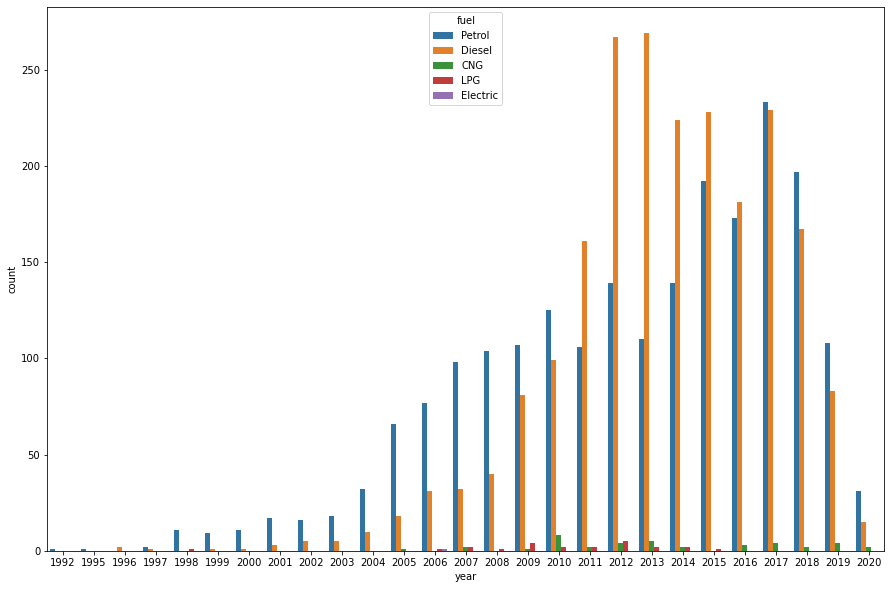

In [32]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x=data['year'], hue=data['fuel'])

<AxesSubplot:xlabel='year', ylabel='count'>

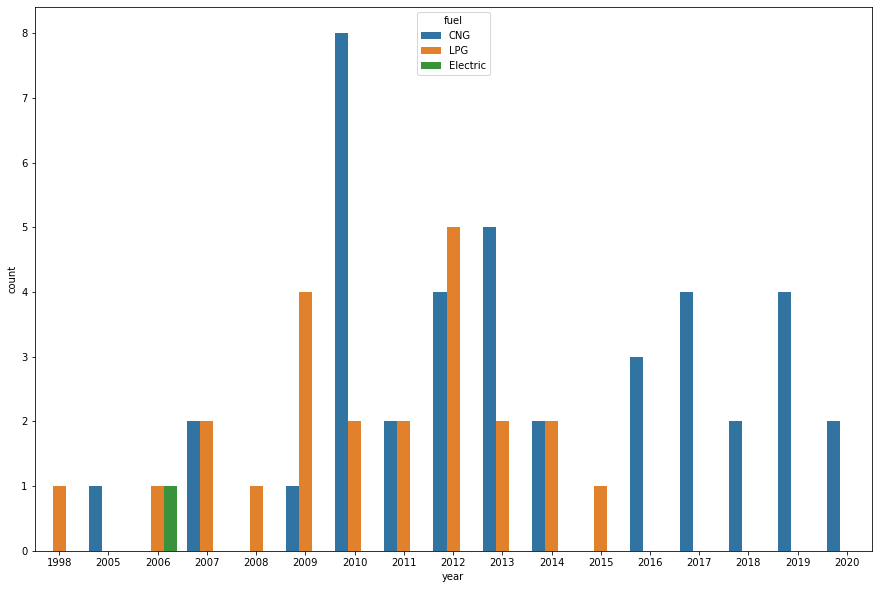

In [46]:
uncommonFuelData = data[(data['fuel'] != 'Diesel') & (data['fuel'] != 'Petrol')]

fig = plt.figure(figsize=(15,10))
sns.countplot(x=uncommonFuelData['year'], hue=uncommonFuelData['fuel'])

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

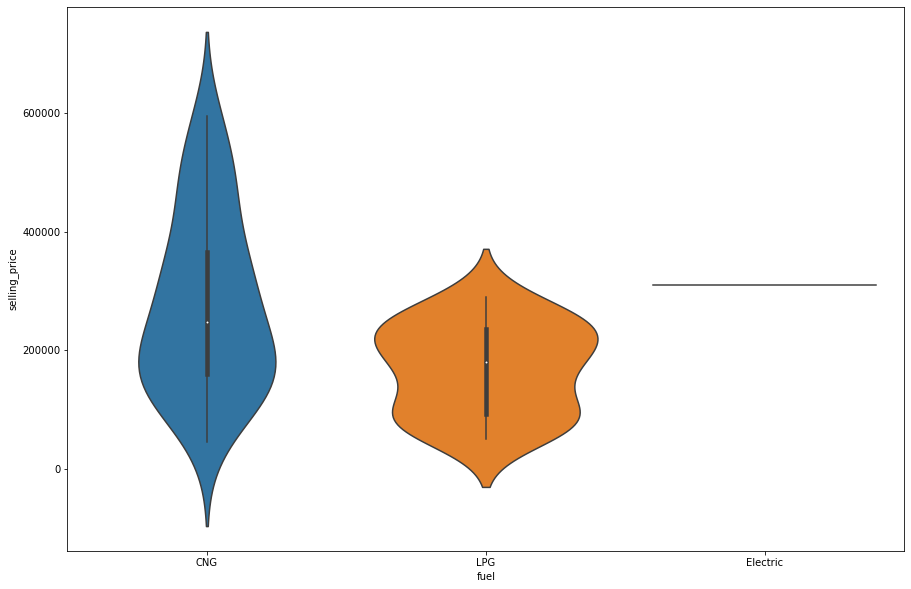

In [47]:
fig = plt.figure(figsize=(15,10))
sns.violinplot(y='selling_price', x='fuel', data = uncommonFuelData)

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

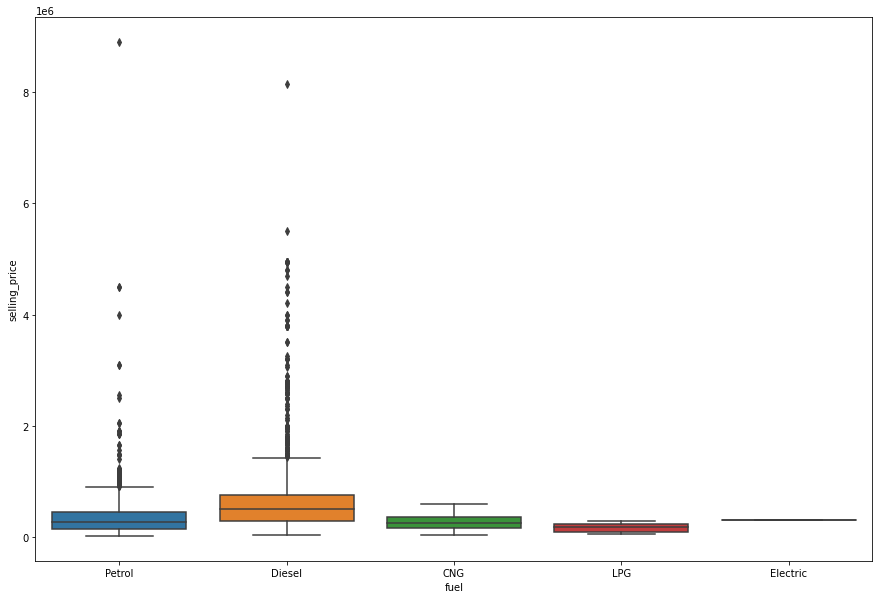

In [51]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(y='selling_price', x='fuel', data = data)

From the above count and boxplots, we can see that CNG LPG and Electric fall relatively in the same price category, and since there are only a few samples of these, it is better to take them as one.

In [129]:
data['fuel'] = data['fuel'].apply(lambda x: x if (x=='Diesel' or x=='Petrol') else 'Other')

In [60]:
data['fuel'].value_counts()

Diesel    2153
Petrol    2123
Other       64
Name: fuel, dtype: int64

### Seller type, is it important?

<AxesSubplot:>

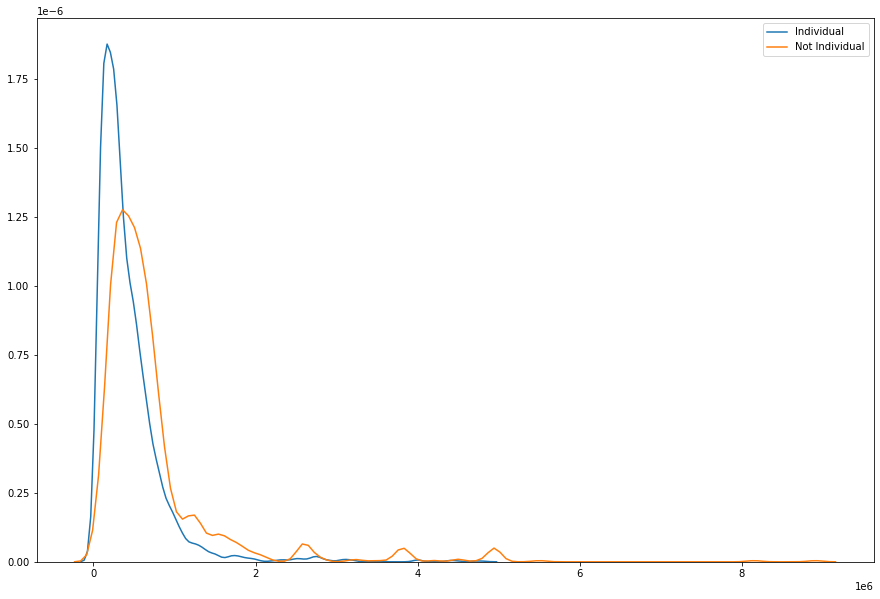

In [66]:
fig = plt.figure(figsize = (15,10))
sns.kdeplot(data=data[data['seller_type'] == 'Individual']['selling_price'], label='Individual')
sns.kdeplot(data=data[data['seller_type'] != 'Individual']['selling_price'], label='Not Individual')

<AxesSubplot:xlabel='selling_price'>

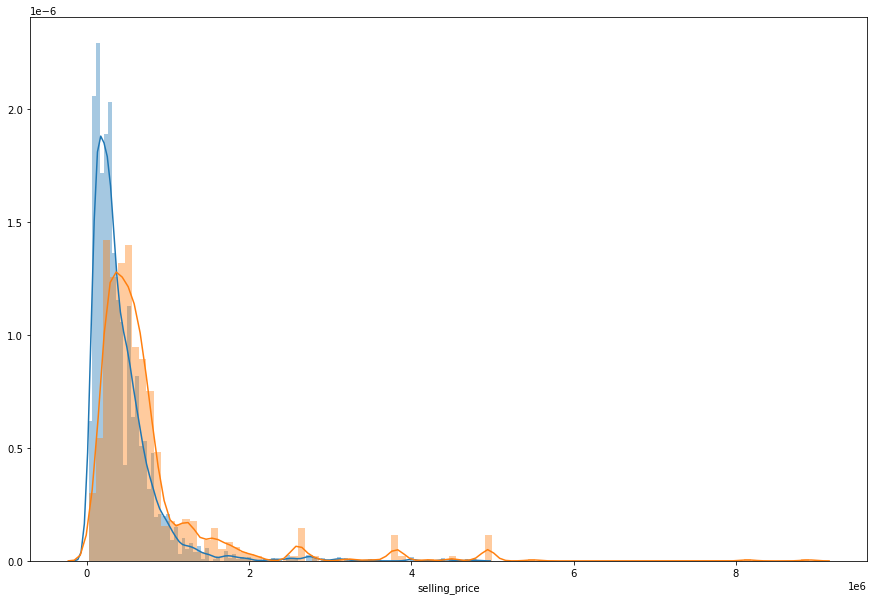

In [70]:
fig = plt.figure(figsize = (15,10))
sns.distplot(data[data['seller_type'] == 'Individual']['selling_price'], label='Individual', bins=100)
sns.distplot(data[data['seller_type'] != 'Individual']['selling_price'], label='Not Individual', bins=100)

Individuals tend to sell at a lower price

### How does the km_driven correlate with the price

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

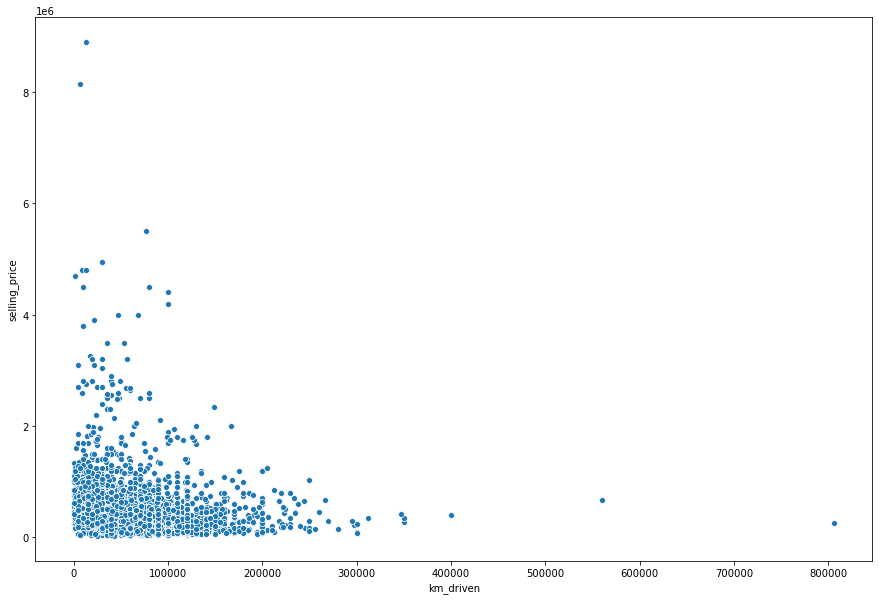

In [73]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x='km_driven', y='selling_price', data=data)

## Data preprocess!
Is there missing data?

In [82]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Make dummy variables for  fuel type, seller type, transmission and owner

In [130]:
data.drop('name', axis=1, inplace=True)

In [ ]:
X=data.drop('selling_price', axis = 1)

In [133]:
y=data['selling_price']

In [135]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,Petrol,Individual,Manual,First Owner
1,2007,50000,Petrol,Individual,Manual,First Owner
2,2012,100000,Diesel,Individual,Manual,First Owner
3,2017,46000,Petrol,Individual,Manual,First Owner
4,2014,141000,Diesel,Individual,Manual,Second Owner


In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [2,3,4,5])], remainder='passthrough')

In [137]:
X_prep = np.array(ct.fit_transform(X))

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep,y, test_size=0.8, random_state=101)

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [155]:
X_train[:,-2:] = sc.fit_transform(X_train[:,-2:])

In [ ]:
X_test[:,-2:] = sc.transform(X_test[:,-2:])

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
lr = LinearRegression()

In [160]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
from sklearn.metrics import mean_squared_error

In [162]:
y_pred = lr.predict(X_test)

In [180]:
np.sqrt(mean_squared_error(y_test, y_pred))

437526.6635726126

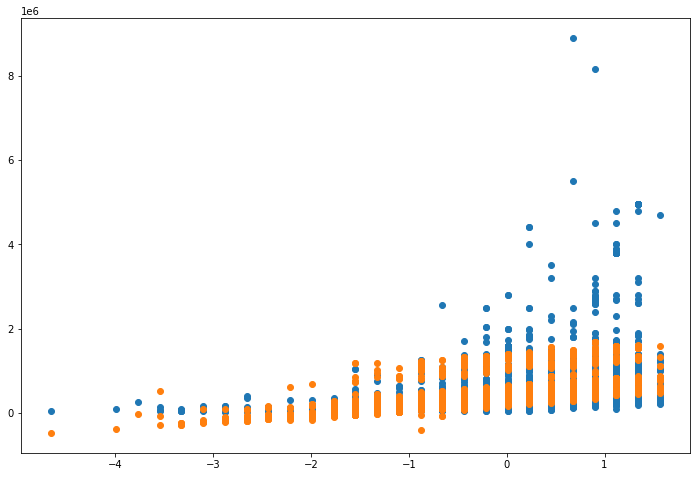

In [181]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x=X_test[:,-2], y=y_test)
plt.scatter(x=X_test[:,-2], y=y_pred)

array([-0.54166387, -0.27714918, -0.29919207, ..., -0.38379269,
       -0.3288618 , -0.32123496])